In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

In [2]:
obs_columns = ['sample', 'cellline', 'treatment']

pdata_nb = pAnnData.import_proteomeDiscoverer(prot_file = 'pd_prot.txt', pep_file = 'pd_pep.txt',obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Source file: pd_prot.txt / pd_pep.txt
Number of files: 12
Proteins: 4988
Peptides: 30920

🔍 25 proteins with missing gene names. Querying UniProt...
✅ Recovered 24 gene names from UniProt.
⚠️ 1 gene names still missing. Assigned as 'UNKNOWN_<accession>' for:
    Q6ZSR9
💡 You can update these using `pdata.update_identifier_maps({'GENE': 'ACCESSION'}, on='protein', direction='reverse', overwrite=True)`

ℹ️  RS matrix: (4988, 30920) (proteins × peptides), sparsity: 99.98%
   - Proteins with ≥2 *unique* linked peptides: 3762/4988
   - Peptides linked to ≥2 proteins: 1677/30920
   - Mean peptides per protein: 6.63
   - Mean proteins per peptide: 1.07
✅ pAnnData object is valid.
--------------------------
✅ Import complete. Use `print(pdata)` to view the object.


Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median


<Axes: xlabel='$log_{2}$ fold change', ylabel='-$log_{10}$ p value'>

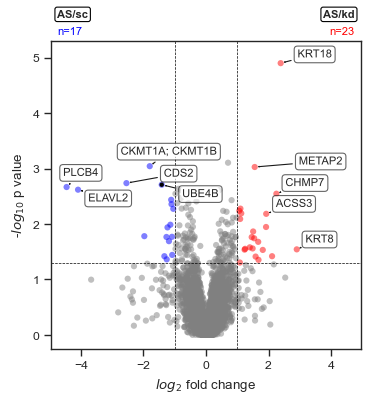

In [3]:
case1 = {'cellline': 'AS', 'treatment': 'kd'}
case2 = {'cellline': 'AS', 'treatment': 'sc'}
case_values = [case1, case2]

fig, ax = plt.subplots(figsize=(4, 4))
ax, volcano_df = scplt.plot_volcano(ax, pdata_nb, values = case_values, pval = 0.05, return_df=True, fold_change_mode='pairwise_median')
ax = scplt.mark_volcano(ax, volcano_df, label=['UBE4B'], label_color="black", show_names=False)
ax
# ax.figure.savefig('AS volcano.png', dpi=300, bbox_inches='tight')
# volcano_df.to_csv('AS volcano.csv')

In [4]:
case1 = {'cellline': 'BE', 'treatment': 'kd'}
case2 = {'cellline': 'BE', 'treatment': 'sc'}
case_values = [case1, case2]

pdata_nb.de(values = case_values, fold_change_mode='pairwise_median')

Filtered by exact match on: {'cellline': 'BE', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'BE', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'BE', 'treatment': 'kd'}] vs [{'cellline': 'BE', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median


,Genes,"[{'cellline': 'BE', 'treatment': 'kd'}]","[{'cellline': 'BE', 'treatment': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
Q9HCN4,GPN1,6.099228e+05,2.188184e+05,1.506982,0.024355,3.524316,1.613411,2.431381,upregulated
O15127,SCAMP2,2.089274e+05,2.836567e+04,2.880756,0.007921,80.364647,2.101207,6.053066,upregulated
P51161,FABP6,4.002723e+06,1.859712e+06,1.092152,0.001583,7.631703,2.800479,3.058548,upregulated
O43292,GPAA1,4.157193e+05,1.491571e+05,1.462098,0.024063,3.537690,1.618643,2.366615,upregulated
P22492,H1-6,7.021507e+05,1.528779e+05,2.309846,0.006367,5.233741,2.196038,5.072510,upregulated
...,...,...,...,...,...,...,...,...,...
O94874,UFL1,3.758821e+06,4.000595e+06,-0.183917,0.739326,-0.356716,0.131164,-0.024123,not significant
Q9BTE3-2,MCMBP,6.916926e+06,7.857212e+06,-0.281216,0.177869,-1.632700,0.749900,-0.210884,not significant
P14406,COX7A2,8.731681e+06,6.846541e+06,0.333909,0.062565,2.561103,1.203669,0.401916,not significant
O43681,GET3,8.350833e+06,7.940000e+06,0.100517,0.668568,0.461276,0.174854,0.017576,not significant


In [13]:
case1 = {'cellline': 'AS', 'treatment': 'kd'}
case2 = {'cellline': 'BE', 'treatment': 'kd'}
case_values = [case1, case2]

pdata_nb.de(values = case_values, fold_change_mode='pairwise_median')

Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'BE', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'BE', 'treatment': 'kd'}] | Method: ttest, FC: pairwise_median


,Genes,"[{'cellline': 'AS', 'treatment': 'kd'}]","[{'cellline': 'BE', 'treatment': 'kd'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
Q9H299,SH3BGRL3,2.844209e+07,2.783732e+06,3.230039,0.034460,3.151621,1.462681,4.724517,upregulated
Q9Y371,SH3GLB1,3.898730e+06,1.926748e+06,1.146330,0.004887,5.633084,2.310981,2.649146,upregulated
P50552,VASP,4.736627e+06,1.124195e+06,1.878631,0.015332,4.061325,1.814402,3.408591,upregulated
Q08380,LGALS3BP,8.289501e+06,3.085213e+06,1.365059,0.004467,5.773956,2.349955,3.207827,upregulated
P05556,ITGB1,4.414289e+07,1.293292e+07,1.945372,0.000350,11.298067,3.456214,6.723621,upregulated
...,...,...,...,...,...,...,...,...,...
Q9H1E3,NUCKS1,5.085406e+06,7.332453e+06,-0.480137,0.219809,-1.453278,0.657954,-0.315908,not significant
P82930,MRPS34,1.658165e+06,1.967941e+06,0.002909,0.485082,-0.768439,0.314185,0.000914,not significant
Q8IV48,ERI1,1.347173e+06,1.981607e+06,-0.548570,0.228849,-1.419191,0.640451,-0.351332,not significant
P78362-2,SRPK2,1.233297e+06,8.964325e+05,0.495791,0.399428,0.942222,0.398561,0.197603,not significant


In [6]:
case1 = {'cellline': 'AS', 'treatment': 'sc'}
case2 = {'cellline': 'BE', 'treatment': 'sc'}
case_values = [case1, case2]

pdata_nb.de(values = case_values, fold_change_mode='pairwise_median')

Filtered by exact match on: {'cellline': 'AS', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
Filtered by exact match on: {'cellline': 'BE', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'sc'}] vs [{'cellline': 'BE', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median


,Genes,"[{'cellline': 'AS', 'treatment': 'sc'}]","[{'cellline': 'BE', 'treatment': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
P12109,COL6A1,1.126416e+06,2.956188e+05,1.972239,0.000122,14.764297,3.911867,7.715136,upregulated
P17275,JUNB,8.896917e+05,2.207515e+05,2.031570,0.003060,6.400334,2.514228,5.107831,upregulated
Q5VT25,CDC42BPA,3.885955e+05,6.576155e+04,2.549838,0.036531,3.608922,1.437334,3.664968,upregulated
Q00653,NFKB2,4.203988e+06,1.145227e+05,5.533552,0.000472,10.460725,3.326102,18.405160,upregulated
P21399,ACO1,5.108964e+06,1.440285e+06,1.765285,0.008824,4.772532,2.054350,3.626513,upregulated
...,...,...,...,...,...,...,...,...,...
Q9NVP1,DDX18,2.115289e+07,1.999325e+07,0.082712,0.634013,0.514518,0.197902,0.016369,not significant
P41223,BUD31,2.043792e+06,1.851732e+06,0.116007,0.496016,0.748045,0.304505,0.035325,not significant
Q96P70,IPO9,1.517423e+07,1.682672e+07,-0.137654,0.112921,-2.024472,0.947225,-0.130389,not significant
P49770,EIF2B2,2.277000e+06,2.782070e+06,-0.325684,0.409345,-0.920624,0.387911,-0.126337,not significant


In [5]:
pdata_nb.list_enrichments()


[STRING Enrichment Summary]

Available DE comparisons (not yet enriched):
  - AS_kd vs AS_sc
  - BE_kd vs BE_sc

To run enrichment: pdata.enrichment_functional(from_de=True, de_key="...")

Completed STRING enrichment results:
  (none)

Completed STRING PPI results:
  (none)


In [6]:
genelist = ['P55072', 'NPLOC4', 'UFD1', 'STX5A', 'NSFL1C', 'UBXN2A', 'UBXN4', 'UBE4B', 'YOD1', 'WASHC5','PLAA','UBXN10']

# key = "[{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}]"
pdata_nb.enrichment_functional(genes=genelist, from_de=False)

[WARNING] Could not resolve 'STX5A' to an accession — skipping.
[WARNING] Could not resolve 'UBXN2A' to an accession — skipping.
[WARNING] Could not resolve 'YOD1' to an accession — skipping.
[WARNING] Could not resolve 'UBXN10' to an accession — skipping.
[INFO] Found 0 cached STRING IDs. 8 need lookup.
[INFO] Cached 7 new STRING ID mappings.
[INFO] Running enrichment on 7 STRING IDs (species 9606)...

[Enrichment: UserSearch1 (user-supplied list)]
  → 8 input genes → 7 STRING IDs
  → Enrichment complete (1.18s)
  → Access: pdata.stats['functional']["UserSearch1"]['result']
  → Plot  : pdata.plot_enrichment_svg("UserSearch1")
  → Web   : https://string-db.org/cgi/network?identifiers=9606.ENSP00000351777%0d9606.ENSP00000331487%0d9606.ENSP00000418529%0d9606.ENSP00000272638%0d9606.ENSP00000343001%0d9606.ENSP00000318016%0d9606.ENSP00000380460&caller_identity=scviz&species=9606&show_query_node_labels=1



,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
0,COMPARTMENTS,GOCC:0036501,2,4,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",1.620000e-06,2.500000e-03,UFD1-NPL4 complex
1,COMPARTMENTS,GOCC:1990730,2,3,9606,"[9606.ENSP00000351777, 9606.ENSP00000418529]","[VCP, NSFL1C]",1.080000e-06,2.500000e-03,VCP-NSFL1C complex
2,COMPARTMENTS,GOCC:0034098,2,8,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",4.860000e-06,3.700000e-03,VCP-NPL4-UFD1 AAA ATPase complex
3,Process,GO:0043161,6,347,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, UBE4B, VCP, PLAA, NSFL1C]",2.180000e-10,3.430000e-06,Proteasome-mediated ubiquitin-dependent protei...
4,Process,GO:0030433,4,82,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, UBE4B, VCP]",1.170000e-08,2.620000e-05,Ubiquitin-dependent ERAD pathway
...,...,...,...,...,...,...,...,...,...,...
112,PMID,PMID:36968438,2,2,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",6.490000e-07,3.410000e-02,(2023) Protein Pull-down Assay Using HiBiT-tag...
113,WikiPathways,WP5202,2,33,9606,"[9606.ENSP00000351777, 9606.ENSP00000418529]","[VCP, NSFL1C]",6.400000e-05,5.000000e-02,Alstrom syndrome
114,NetworkNeighborAL,CL:4192,5,15,9606,"[9606.ENSP00000272638, 9606.ENSP00000331487, 9...","[UBXN4, NPLOC4, VCP, PLAA, NSFL1C]",1.310000e-14,6.010000e-11,Domain present in ubiquitin-regulatory protein...
115,NetworkNeighborAL,CL:4194,2,5,9606,"[9606.ENSP00000331487, 9606.ENSP00000351777]","[NPLOC4, VCP]",2.270000e-06,1.700000e-03,VCP-NPL4-UFD1 AAA ATPase complex


In [7]:
pdata_nb.enrichment_ppi(genes=genelist)

[INFO] Resolving input genes (12 items)...
[WARNING] Could not resolve 'STX5A' to an accession — skipping.
[WARNING] Could not resolve 'UBXN2A' to an accession — skipping.
[WARNING] Could not resolve 'YOD1' to an accession — skipping.
[WARNING] Could not resolve 'UBXN10' to an accession — skipping.
[INFO] Found 7 cached STRING IDs. 1 need lookup.
[ERROR] Failed on batch 1: No columns to parse from file
[WARNING] No STRING mappings returned for the requested identifiers.
[INFO] Running PPI enrichment for 7 STRING IDs (species 9606)...
[DEBUG] PPI enrichment result: [{'number_of_nodes': 7, 'number_of_edges': 15, 'average_node_degree': 4.29, 'local_clustering_coefficient': 0.9, 'expected_number_of_edges': 0, 'p_value': 0.0}]

[PPI Enrichment: UserPPI1]
  → 7 STRING IDs
  → 15 edges vs 0 expected
  → p = 0.00e+00
  → Access: pdata.stats['ppi']['UserPPI1']['result']



{'number_of_nodes': 7,
 'number_of_edges': 15,
 'average_node_degree': 4.29,
 'local_clustering_coefficient': 0.9,
 'expected_number_of_edges': 0,
 'p_value': 0.0}

[INFO] Fetching STRING SVG for key 'UserSearch1' (n=7)...


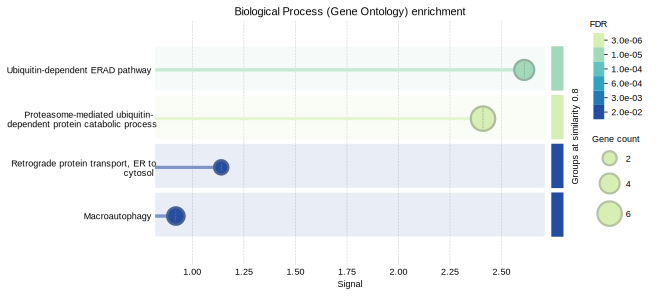

In [8]:
pdata_nb.plot_enrichment_svg("UserSearch1")

In [9]:
pdata_nb.list_enrichments()


[STRING Enrichment Summary]

Available DE comparisons (not yet enriched):
  - AS_kd vs AS_sc
  - BE_kd vs BE_sc

To run enrichment: pdata.enrichment_functional(from_de=True, de_key="...")

Completed STRING enrichment results:
  - UserSearch1 (User)
    Access table: pdata.stats["UserSearch1"]
    Plot result : pdata.plot_enrichment_svg("UserSearch1")
    View online  : https://string-db.org/cgi/network?identifiers=9606.ENSP00000351777%0d9606.ENSP00000331487%0d9606.ENSP00000418529%0d9606.ENSP00000272638%0d9606.ENSP00000343001%0d9606.ENSP00000318016%0d9606.ENSP00000380460&caller_identity=scviz&species=9606&show_query_node_labels=1

Completed STRING PPI results:
  - UserPPI1 (User)
    Access result: pdata.stats['ppi']['UserPPI1']['result']


In [10]:
key1 = "BE_kd vs BE_sc"
# key = "[{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}]"
pdata_nb.enrichment_functional(de_key=key1)

[INFO] Found 0 cached STRING IDs. 34 need lookup.
[INFO] Cached 34 new STRING ID mappings.
[INFO] Running enrichment on 34 STRING IDs (species 9606)...

[Enrichment: BE_kd vs BE_sc (up-regulated)]
  → 34 proteins → 34 STRING IDs
  → Enrichment complete (0.76s)
  → Access: pdata.stats['functional']["BE_kd vs BE_sc_up"]['result']
  → Plot  : pdata.plot_enrichment_svg("BE_kd vs BE_sc", direction="up")
  → Web   : https://string-db.org/cgi/network?identifiers=9606.ENSP00000264718%0d9606.ENSP00000268099%0d9606.ENSP00000377549%0d9606.ENSP00000347206%0d9606.ENSP00000341214%0d9606.ENSP00000271526%0d9606.ENSP00000384018%0d9606.ENSP00000360305%0d9606.ENSP00000224807%0d9606.ENSP00000346080%0d9606.ENSP00000221265%0d9606.ENSP00000370254%0d9606.ENSP00000467537%0d9606.ENSP00000416706%0d9606.ENSP00000418915%0d9606.ENSP00000262428%0d9606.ENSP00000417580%0d9606.ENSP00000253237%0d9606.ENSP00000254286%0d9606.ENSP00000235521%0d9606.ENSP00000373215%0d9606.ENSP00000245615%0d9606.ENSP00000361004%0d9606.ENSP00

In [11]:
key2 = "AS_kd vs AS_sc"
# key = "[{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}]"
pdata_nb.enrichment_functional(de_key=key2)

[INFO] Found 2 cached STRING IDs. 21 need lookup.
[INFO] Cached 21 new STRING ID mappings.
[INFO] Running enrichment on 23 STRING IDs (species 9606)...

[Enrichment: AS_kd vs AS_sc (up-regulated)]
  → 23 proteins → 23 STRING IDs
  → Enrichment complete (9.07s)
  → Access: pdata.stats['functional']["AS_kd vs AS_sc_up"]['result']
  → Plot  : pdata.plot_enrichment_svg("AS_kd vs AS_sc", direction="up")
  → Web   : https://string-db.org/cgi/network?identifiers=9606.ENSP00000258648%0d9606.ENSP00000384638%0d9606.ENSP00000449404%0d9606.ENSP00000351190%0d9606.ENSP00000449089%0d9606.ENSP00000430241%0d9606.ENSP00000325312%0d9606.ENSP00000366306%0d9606.ENSP00000271640%0d9606.ENSP00000485033%0d9606.ENSP00000261622%0d9606.ENSP00000373489%0d9606.ENSP00000221859%0d9606.ENSP00000251871%0d9606.ENSP00000359804%0d9606.ENSP00000331879%0d9606.ENSP00000358719%0d9606.ENSP00000366939%0d9606.ENSP00000222800%0d9606.ENSP00000384537%0d9606.ENSP00000380794%0d9606.ENSP00000265641%0d9606.ENSP00000449535&caller_identi

In [14]:
pdata_nb.list_enrichments()


[STRING Enrichment Summary]

Available DE comparisons (not yet enriched):
  - AS_kd vs BE_kd

To run enrichment: pdata.enrichment_functional(from_de=True, de_key="...")

Completed STRING enrichment results:
  - UserSearch1 (User)
    Access table: pdata.stats["UserSearch1"]
    Plot result : pdata.plot_enrichment_svg("UserSearch1")
    View online  : https://string-db.org/cgi/network?identifiers=9606.ENSP00000351777%0d9606.ENSP00000331487%0d9606.ENSP00000418529%0d9606.ENSP00000272638%0d9606.ENSP00000343001%0d9606.ENSP00000318016%0d9606.ENSP00000380460&caller_identity=scviz&species=9606&show_query_node_labels=1
  - BE_kd vs BE_sc_up (DE-based)
    Access table: pdata.stats["BE_kd vs BE_sc_up"]
    Plot result : pdata.plot_enrichment_svg("BE_kd vs BE_sc", direction="up")
    View online  : https://string-db.org/cgi/network?identifiers=9606.ENSP00000264718%0d9606.ENSP00000268099%0d9606.ENSP00000377549%0d9606.ENSP00000347206%0d9606.ENSP00000341214%0d9606.ENSP00000271526%0d9606.ENSP0000038

In [17]:
pdata_nb.stats['ppi']['UserPPI1']['result']

{'number_of_nodes': 7,
 'number_of_edges': 15,
 'average_node_degree': 4.29,
 'local_clustering_coefficient': 0.9,
 'expected_number_of_edges': 0,
 'p_value': 0.0}

In [15]:
pdata_nb.stats["None_up"]

,category,term,number_of_genes,number_of_genes_in_background,ncbiTaxonId,inputGenes,preferredNames,p_value,fdr,description
0,TISSUES,BTO:0001491,22,5378,9606,"[9606.ENSP00000221265, 9606.ENSP00000229379, 9...","[PAF1, COX6A1, WARS2, MBOAT7, GRWD1, COTL1, GP...",0.000006,0.0144,Viscus
1,TISSUES,BTO:0000522,24,7004,9606,"[9606.ENSP00000221265, 9606.ENSP00000229379, 9...","[PAF1, COX6A1, WARS2, MBOAT7, GRWD1, ACTR10, C...",0.000035,0.0423,Gland
2,TISSUES,BTO:0000282,23,6642,9606,"[9606.ENSP00000224807, 9606.ENSP00000229379, 9...","[SFXN3, COX6A1, WARS2, MBOAT7, GRWD1, WDR44, A...",0.000056,0.0455,Head


In [1]:
from scviz import pAnnData as pAnnData
from scviz import plotting as scplt
from scviz import utils as scutils
import scanpy as sc

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks')

import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# diann

In [2]:
obs_columns = ['name','load','enzyme','date','instrument','acquisition','method','gradient','replicate']

pdata = pAnnData.import_diann('diann_short.tsv', obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Source file: diann_short.tsv
Number of files: 10
Proteins: 6
Peptides: 98

[update_summary] → Mode: recompute

ℹ️  RS matrix: (6, 98) (proteins × peptides), sparsity: 83.33%
   - Proteins with ≥2 *unique* linked peptides: 6/6
   - Peptides with ≥2 linked proteins: 0/98
   - Mean peptides per protein: 16.33
   - Mean proteins per peptide: 1.00
✅ pAnnData object is valid.
--------------------------
✅ Import complete. Use `print(pdata)` to view the object.


In [3]:
pdata.print_history()

-------------------------------
History:
-------------------------------
1: Imported DIA-NN report from report.tsv using PG.MaxLFQ (protein) and Precursor.Normalised (peptide).


,Genes,Protein.Group,Precursor.Charge,Modified.Sequence,Stripped.Sequence,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_03,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler_Aur60min_01
AAAAAAAAAPAAAATAPTTAATTAATAAQ2,SRP14,P37108,2,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,True,True,True,True,True,True,True,True,False,False
AAAAAAAAAPAAAATAPTTAATTAATAAQ3,SRP14,P37108,3,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,True,True,True,False,True,True,True,False,True,False
AAAAAAAAAPAAAATAPTTAATTAATAAQ4,SRP14,P37108,4,AAAAAAAAAPAAAATAPTTAATTAATAAQ,AAAAAAAAAPAAAATAPTTAATTAATAAQ,False,False,False,True,False,False,False,True,False,False
AAAAAAALQAK1,RPL4,P36578,1,AAAAAAALQAK,AAAAAAALQAK,True,True,True,False,True,True,True,True,False,False
AAAAAAALQAK2,RPL4,P36578,2,AAAAAAALQAK,AAAAAAALQAK,True,True,False,True,True,False,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
YYVTIIDAPGHRDFIK4,EEF1A1;EEF1A1P5,P68104;Q5VTE0,4,YYVTIIDAPGHRDFIK,YYVTIIDAPGHRDFIK,True,True,False,False,False,False,False,False,True,False
YYYIPQYK1,NDUFAF2,Q8N183,1,YYYIPQYK,YYYIPQYK,False,True,True,True,True,True,False,False,True,False
YYYIPQYK2,NDUFAF2,Q8N183,2,YYYIPQYK,YYYIPQYK,False,True,True,True,False,False,False,False,False,True
YYYQLNSK1,CBX4,O00257,1,YYYQLNSK,YYYQLNSK,False,True,False,False,True,False,False,False,False,False


In [6]:
pdata.prot.var

,First.Protein.Description,Genes,peptides_per_protein,unique_peptides,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_03,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler_Aur60min_01
P37108,Signal recognition particle 14 kDa protein,SRP14,10,10,True,True,True,True,True,True,True,True,True,True
P36578,60S ribosomal protein L4,RPL4,27,27,True,True,True,True,True,True,True,True,True,True
Q9H9P5,Putative E3 ubiquitin-protein ligase UNKL,UNKL,1,1,False,False,False,True,False,False,False,False,True,False
A6NIH7,Protein unc-119 homolog B,UNC119B,2,2,True,True,True,True,True,True,True,True,True,False
Q9P258,Protein RCC2,RCC2,18,18,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q9GZM8,Nuclear distribution protein nudE-like 1,NDEL1,1,1,False,False,False,False,False,False,False,False,False,True
Q9UK99,F-box only protein 3,FBXO3,1,1,False,False,False,True,False,False,True,True,False,False
H0YCP8,Poly(U)-binding-splicing factor PUF60 (Fragment),PUF60,1,1,False,True,False,False,False,True,False,False,False,False
Q9NVM4,Protein arginine N-methyltransferase 7,PRMT7,1,1,False,False,True,False,False,True,False,False,False,False


In [14]:
missing_genes = pdata.prot.var[pdata.prot.var["Genes"].isna()]

missing_genes

,First.Protein.Description,Genes,peptides_per_protein,unique_peptides,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela20ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela2ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_03,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_02,Found In: Marion_Hela200pg_LysC_20240321_QE_DIA_Mechtler_Aur60min_01,Found In: Marion_Hela200ng_LysC_20240321_QE_DDA_Mechtler_Aur60min_01
Q6ZUT4,Putative uncharacterized protein FLJ43343,NaN,1,1,False,False,False,False,False,False,False,False,False,True
H0YIV9,Uncharacterized protein (Fragment),NaN,4,4,True,True,True,True,True,True,False,True,True,True
A0A1B0GVF1,Uncharacterized protein (Fragment),NaN,1,1,True,False,True,False,True,False,False,False,False,False


# PD file import

In [2]:
obs_columns = ['sample', 'cellline', 'treatment']
pdata_pd = pAnnData.import_proteomeDiscoverer(prot_file = 'pd_prot_short.txt', pep_file = 'pd_pep_short.txt', obs_columns=obs_columns)

--------------------------
Starting import...
--------------------------
Source file: pd_prot_short.txt / pd_pep_short.txt
Number of files: 12
Proteins: 6
Peptides: 82

[update_summary] → Mode: recompute

ℹ️  RS matrix: (6, 82) (proteins × peptides), sparsity: 82.93%
   - Proteins with ≥2 *unique* linked peptides: 5/6
   - Peptides linked to ≥2 proteins: 2/82
   - Mean peptides per protein: 14.00
   - Mean proteins per peptide: 1.02
✅ pAnnData object is valid.
--------------------------
✅ Import complete. Use `print(pdata)` to view the object.


In [6]:
pdata_pd.metadata

{'source': 'proteomeDiscoverer',
 'prot_file': 'pd_prot_short.txt',
 'pep_file': 'pd_pep_short.txt',
 'imported_at': '2025-04-04T16:53:14.912005'}

In [12]:
values=[{'cellline': 'AS', 'treatment': 'kd'},
        {'cellline': 'AS', 'treatment': 'sc'}]

de_mean = pdata_pd.de(values)
de_protpair = pdata_pd.de(values, fold_change_mode='pairwise_median')
de_peppair = pdata_pd.de(values, fold_change_mode='pep_pairwise_median')

Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
[update_summary] → Mode: norm
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
[update_summary] → Mode: norm
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}] | Method: ttest, FC: mean
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'kd'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
[update_summary] → Mode: norm
Filtered by exact match on: {'cellline': 'AS', 'treatment': 'sc'}. Number of samples kept: 3. Copy of the filtered AnnData object returned.
[update_summary] → Mode: norm
✅ Differential expression complete: [{'cellline': 'AS', 'treatment': 'kd'}] vs [{'cellline': 'AS', 'treatment': 'sc'}] | Method: ttest, FC: pairwise_median
Filtered by exact m

In [5]:
de_mean

,Genes,"[{'cellline': 'AS', 'treatment': 'kd'}]","[{'cellline': 'AS', 'treatment': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
O95155,UBE4B,4.685169e+04,1.572978e+05,-1.747326,0.001951,-7.220246,2.709650,-4.734640,downregulated
P04406,GAPDH,6.187720e+08,5.307904e+08,0.221266,0.343936,1.072389,0.463523,0.102562,not significant
P55072,VCP,8.456701e+07,7.307142e+07,0.210788,0.475192,0.787191,0.323131,0.068112,not significant
P24941,CDK2,2.047995e+06,1.951742e+06,0.069450,0.841887,0.212801,0.074746,0.005191,not significant
Q6ZRP7,QSOX2,2.091416e+05,3.176303e+05,-0.602869,0.017282,-3.917619,1.762397,-1.062494,not significant
P06493,CDK1,1.269116e+07,1.274044e+07,-0.005591,0.982999,-0.022670,0.007447,-0.000042,not significant


In [6]:
de_protpair

,Genes,"[{'cellline': 'AS', 'treatment': 'kd'}]","[{'cellline': 'AS', 'treatment': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
O95155,UBE4B,4.685169e+04,1.572978e+05,-1.414010,0.001951,-7.220246,2.709650,-3.831473,downregulated
P04406,GAPDH,6.187720e+08,5.307904e+08,0.154769,0.343936,1.072389,0.463523,0.071739,not significant
P55072,VCP,8.456701e+07,7.307142e+07,0.107330,0.475192,0.787191,0.323131,0.034682,not significant
P24941,CDK2,2.047995e+06,1.951742e+06,0.182938,0.841887,0.212801,0.074746,0.013674,not significant
Q6ZRP7,QSOX2,2.091416e+05,3.176303e+05,-0.636745,0.017282,-3.917619,1.762397,-1.122197,not significant
P06493,CDK1,1.269116e+07,1.274044e+07,0.029608,0.982999,-0.022670,0.007447,0.000220,not significant


In [13]:
de_peppair

,Genes,"[{'cellline': 'AS', 'treatment': 'kd'}]","[{'cellline': 'AS', 'treatment': 'sc'}]",log2fc,p_value,test_statistic,-log10(p_value),significance_score,significance
O95155,UBE4B,4.685169e+04,1.572978e+05,-1.414010,0.001951,-7.220246,2.709650,-3.831473,downregulated
P04406,GAPDH,6.187720e+08,5.307904e+08,0.193539,0.343936,1.072389,0.463523,0.089710,not significant
P55072,VCP,8.456701e+07,7.307142e+07,0.309592,0.475192,0.787191,0.323131,0.100039,not significant
P24941,CDK2,2.047995e+06,1.951742e+06,0.104916,0.841887,0.212801,0.074746,0.007842,not significant
Q6ZRP7,QSOX2,2.091416e+05,3.176303e+05,-0.636745,0.017282,-3.917619,1.762397,-1.122197,not significant
P06493,CDK1,1.269116e+07,1.274044e+07,0.057081,0.982999,-0.022670,0.007447,0.000425,not significant
